**Author:** Abyan Bismar Alfayed 

**NRP:** 5025221026

**Link Github:** https://github.com/abyanba/data-mining-1

**Link Kaggle:** https://www.kaggle.com/code/abyanba/data-mining-tugas-1

**Link Dataset:** https://www.kaggle.com/datasets/abdulwadood11220/netflix-customer-churn-dataset

#### **PENDAHULUAN**

Notebook ini berisi Analisis Data Eksplorasi (EDA) pada dataset Netflix Customer Churn. Tujuannya adalah untuk memahami karakteristik pelanggan, mengidentifikasi pola yang berkaitan dengan churn (pelanggan yang berhenti berlangganan), dan menemukan wawasan yang dapat ditindaklanjuti. Analisis ini mencakup pemeriksaan distribusi data, hubungan antar fitur, dan perbandingan antara pelanggan yang churn dan yang tidak.

#### **PENJELASAN FITUR**

**Fitur Target:**
- **`churned`**: Status churn pelanggan. `1` jika pelanggan berhenti berlangganan, dan `0` jika masih aktif.

**Fitur Identitas:**
- **`customer_id`**: ID unik untuk setiap pelanggan.

**Fitur Numerik:**
- **`age`**: Usia pelanggan dalam tahun.
- **`monthly_fee`**: Biaya langganan bulanan yang dibayarkan oleh pelanggan.
- **`watch_hours`**: Total jam yang dihabiskan pelanggan untuk menonton konten.
- **`last_login_days`**: Jumlah hari sejak pelanggan terakhir kali login.
- **`avg_watch_time_per_day`**: Rata-rata waktu menonton pelanggan per hari.
- **`number_of_profiles`**: Jumlah profil yang terdaftar dalam satu akun pelanggan.

**Fitur Kategorikal:**
- **`gender`**: Jenis kelamin pelanggan.
- **`subscription_type`**: Jenis paket langganan yang dipilih (misalnya, Basic, Standard, Premium).
- **`region`**: Wilayah geografis tempat pelanggan berada.
- **`device`**: Perangkat utama yang digunakan pelanggan untuk mengakses layanan.
- **`payment_method`**: Metode pembayaran yang digunakan (misalnya, Kartu Kredit, PayPal).
- **`favorite_genre`**: Genre konten yang paling sering ditonton oleh pelanggan.


#### **PROBLEM YANG BISA DISELESAIKAN**
- Prediksi pengguna yang akan berhenti berlangganan
- Identifikasi faktor-faktor utama yang menyebabkan churn (pengguna tidak lagi berlangganan)
- Segmentasi pelanggan
- Optimalisasi harga dan paket langganan
- Analisis strategi & akuisisi konten yang tersegmentasi
- Analisis efektivitas metode pembayaran
- Peningkatan kinerja dan teknis pengalaman

### **1. IMPORT**

In [1]:
import pandas as pd #manipulasi data
import numpy as np #komputasi numerik
import matplotlib.pyplot as plt #visualisasi
import seaborn as sns #visualisasi
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='whitegrid')

### **2. INFORMASI & STATISTIK DATASET**

In [2]:
file_path = '/kaggle/input/netflix-customer-churn-dataset/netflix_customer_churn.csv'
df = pd.read_csv(file_path)

display(df.head())
print('')
print('Bentuk data:', df.shape)
print('Jumlah data:', df.size)

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action



Bentuk data: (5000, 14)
Jumlah data: 70000


In [3]:
df.describe()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,13.683400,0.503000,3.024400,0.874800
std,15.501128,12.014654,17.536078,3.692062,0.500041,1.415841,2.619824
min,18.000000,0.010000,0.000000,8.990000,0.000000,1.000000,0.000000
25%,30.000000,3.337500,15.000000,8.990000,0.000000,2.000000,0.110000
50%,44.000000,8.000000,30.000000,13.990000,1.000000,3.000000,0.290000
75%,58.000000,16.030000,45.000000,17.990000,1.000000,4.000000,0.720000
max,70.000000,110.400000,60.000000,17.990000,1.000000,5.000000,98.420000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

In [5]:
df.isna().sum()

customer_id               0
age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
region                    0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64

In [6]:
df.nunique()

customer_id               5000
age                         53
gender                       3
subscription_type            3
watch_hours               2343
last_login_days             61
region                       6
device                       5
monthly_fee                  3
churned                      2
payment_method               5
number_of_profiles           5
avg_watch_time_per_day     505
favorite_genre               7
dtype: int64

Dari informasi-informasi tersebut, kita dapat mengetahui bahwa ini merupakan dataset yang bersih dengan kualitas data yang baik.

### **3. DISTRIBUSI FITUR TARGET - CHURN**

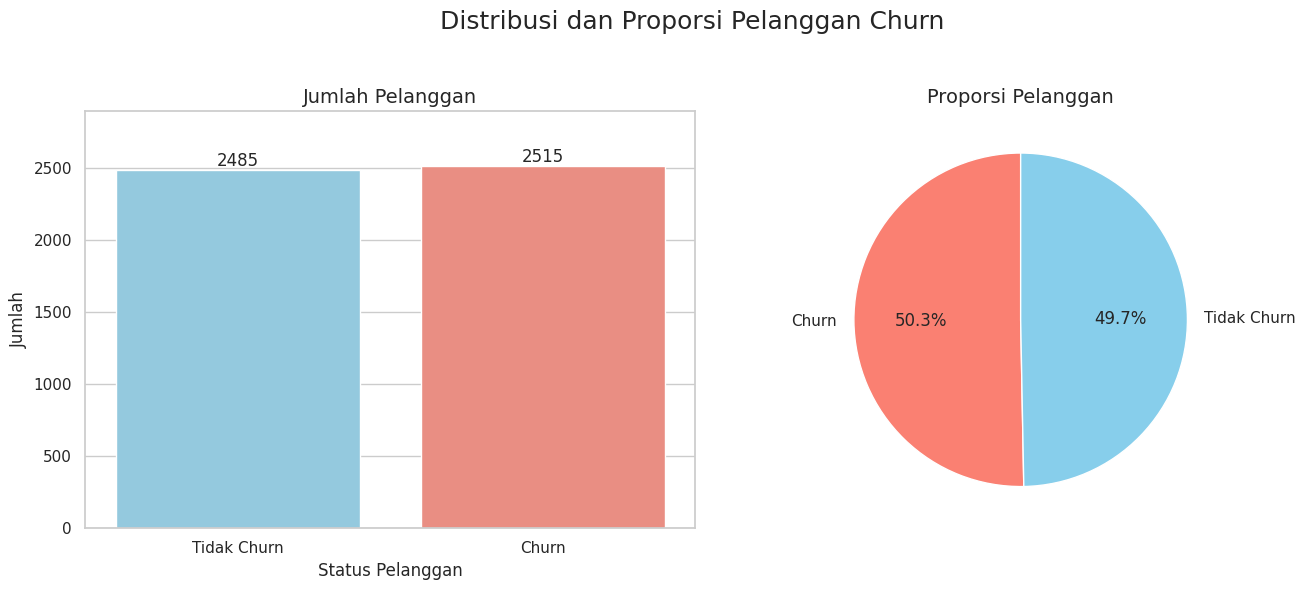

In [7]:
df['Status Churn'] = df['churned'].map({0: 'Tidak Churn', 1: 'Churn'})

plt.figure(figsize=(14, 6))
plt.suptitle('Distribusi dan Proporsi Pelanggan Churn', fontsize=18)

# Barplot
ax1 = plt.subplot(1, 2, 1)
sns.countplot(
    x='Status Churn', 
    data=df, 
    palette={'Tidak Churn': 'skyblue', 'Churn': 'salmon'},
    order=['Tidak Churn', 'Churn'],
    ax=ax1
)
ax1.bar_label(ax1.containers[0])
ax1.set_title('Jumlah Pelanggan', fontsize=14)
ax1.set_xlabel('Status Pelanggan')
ax1.set_ylabel('Jumlah')
ax1.set_ylim(0, df['Status Churn'].value_counts().max() * 1.15)

# Piechart
ax2 = plt.subplot(1, 2, 2)
churn_counts = df['Status Churn'].value_counts()
labels = churn_counts.index
colors = ['salmon', 'skyblue']

ax2.pie(
    churn_counts, 
    labels=labels, 
    colors=colors,
    autopct='%1.1f%%', # Menampilkan persentase
    startangle=90
)
ax2.set_title('Proporsi Pelanggan', fontsize=14)

# Tampilkan kedua plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Fitur target memiliki distribusi yang seimbang, menandakan bahwa ini merupakan dataset yang balance

### **4. VISUALISASI DISTRIBUSI FITUR NUMERIK**

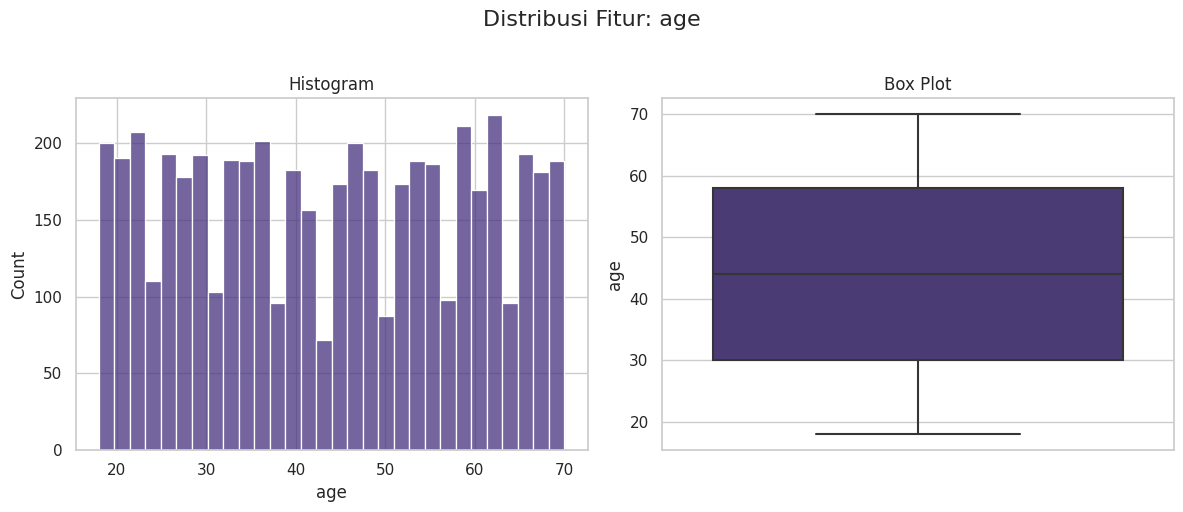

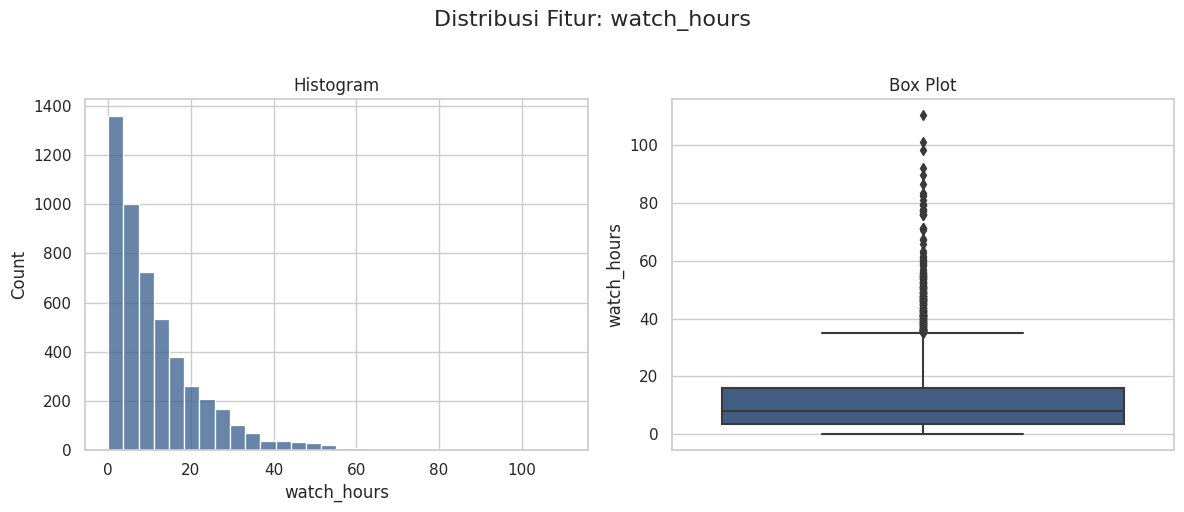

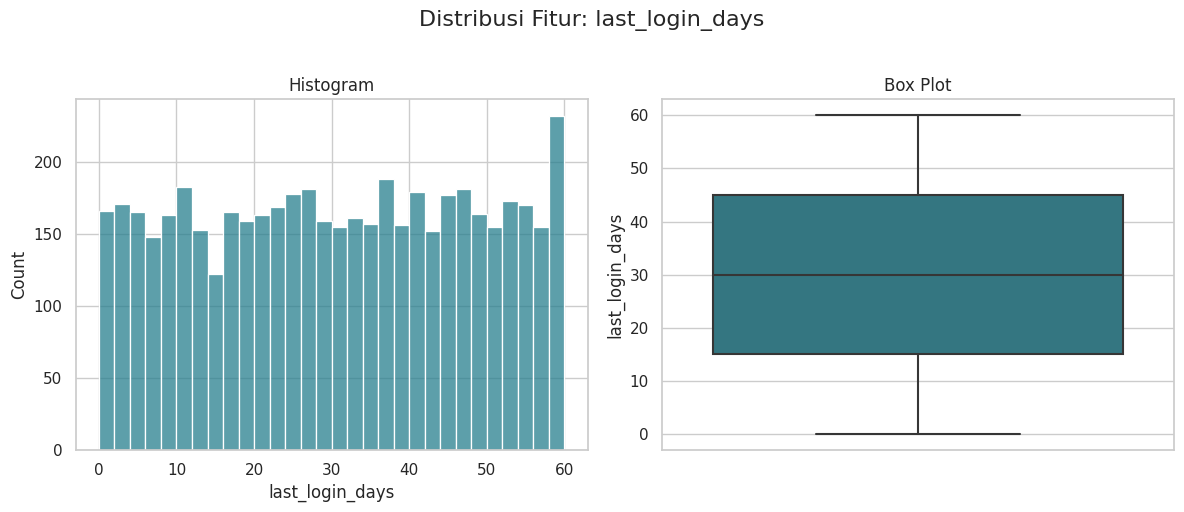

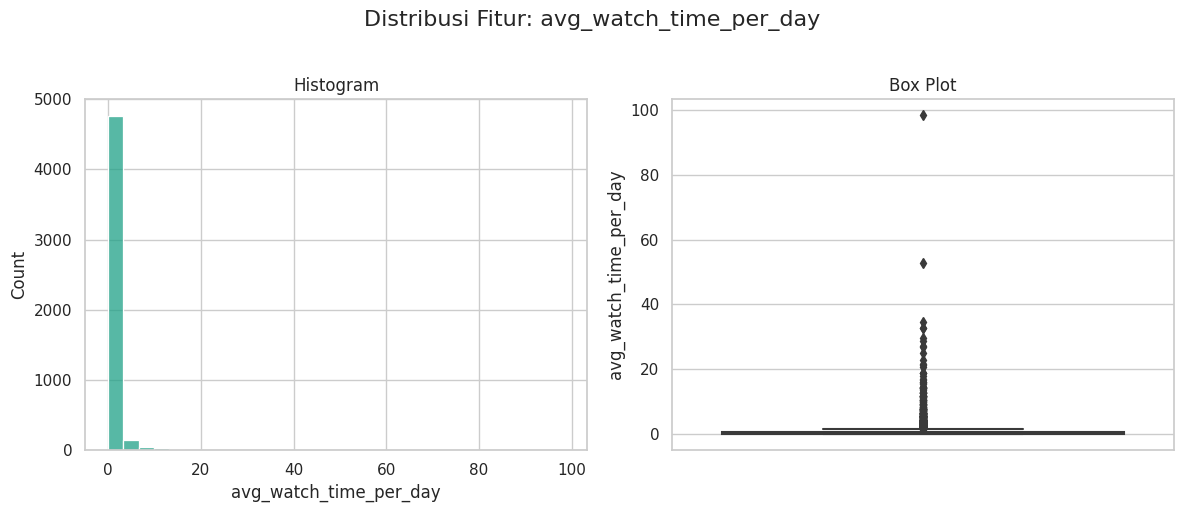

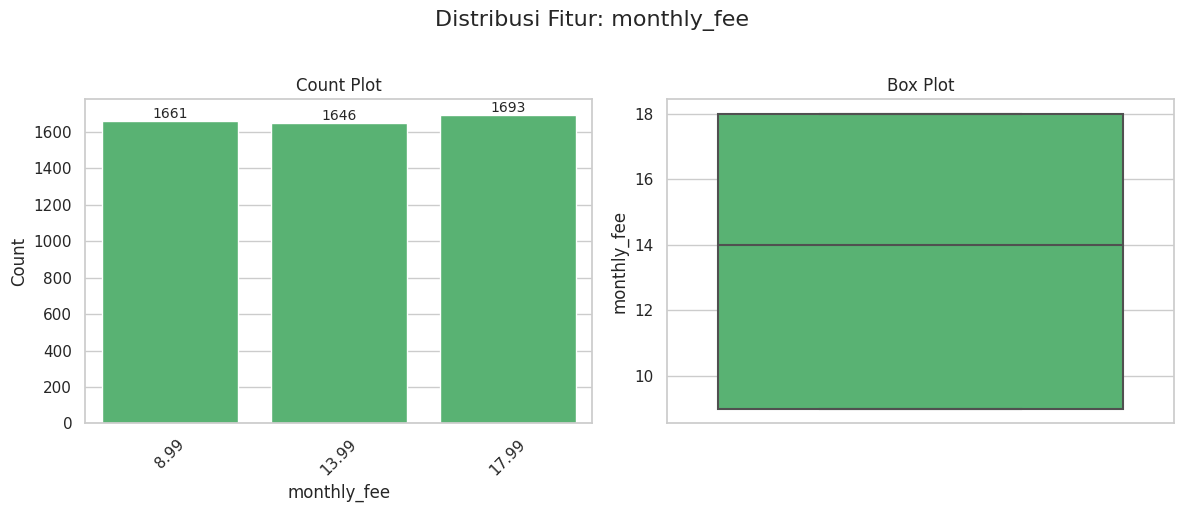

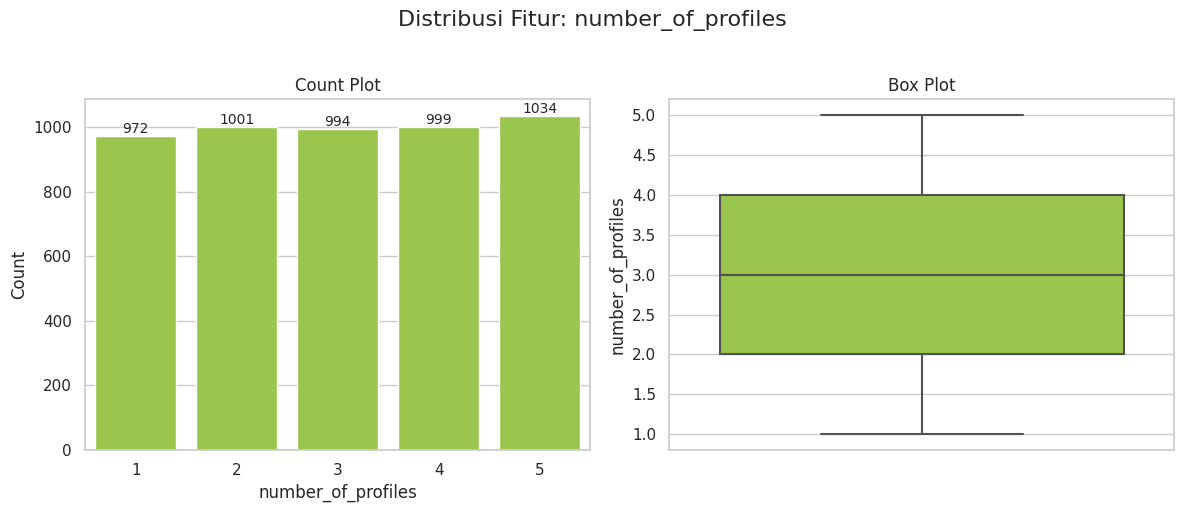

In [8]:
numerical_features = ['age', 'watch_hours', 'last_login_days', 'avg_watch_time_per_day', 'monthly_fee', 'number_of_profiles']

# Color palette
palette = sns.color_palette('viridis', n_colors=len(numerical_features))
color_map = dict(zip(numerical_features, palette))

for col in numerical_features:
    plt.figure(figsize=(12, 5))
    plt.suptitle(f'Distribusi Fitur: {col}', fontsize=16, y=1.02)    
    ax1 = plt.subplot(1, 2, 1)

    if col in ['monthly_fee', 'number_of_profiles']:
        # Countplot jika kedua fitur diatas
        sns.countplot(x=df[col], color=color_map[col], ax=ax1, order=sorted(df[col].unique()))
        ax1.bar_label(ax1.containers[0], fmt='%.0f', fontsize=10)
        ax1.set_title('Count Plot')
        if col == 'monthly_fee':
            ax1.tick_params(axis='x', rotation=45)

    else:
        # Histogram
        sns.histplot(df[col], bins=30, kde=False, color=color_map[col], ax=ax1)
        ax1.set_title('Histogram')
    ax1.set_ylabel('Count')
    
    # Boxplot
    ax2 = plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col], color=color_map[col], ax=ax2)
    ax2.set_title('Box Plot')
    
    plt.tight_layout()
    plt.show()

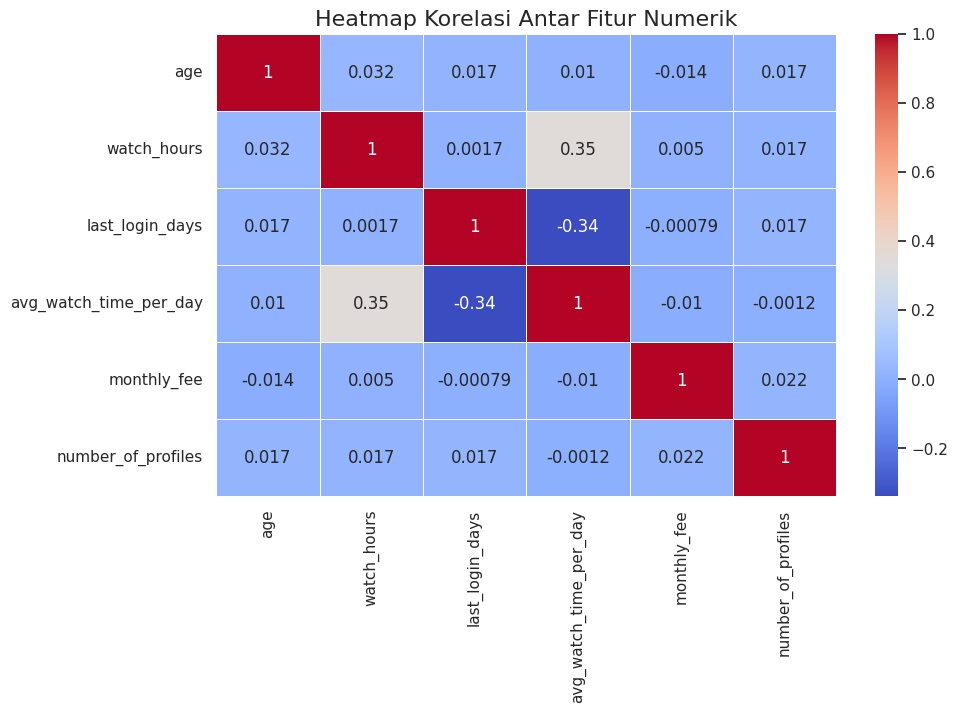

In [9]:
# Matriks Korelasi
correlation_matrix = df[numerical_features].corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap Korelasi Antar Fitur Numerik', fontsize=16)
plt.show()

### **5. VISUALISASI DISTRIBUSI FITUR KATEGORIKAL**

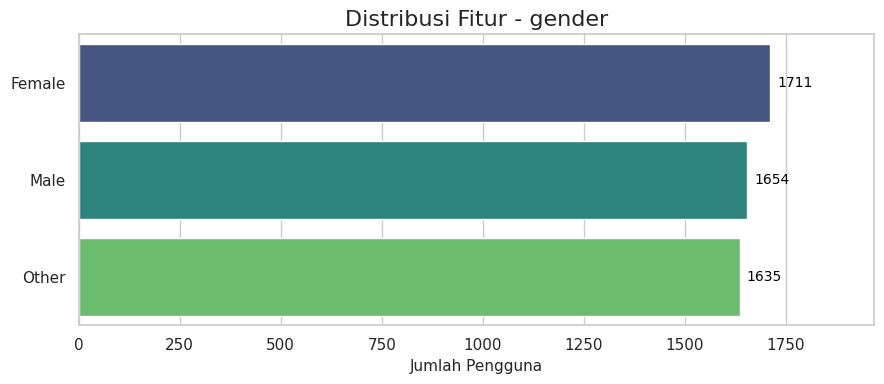

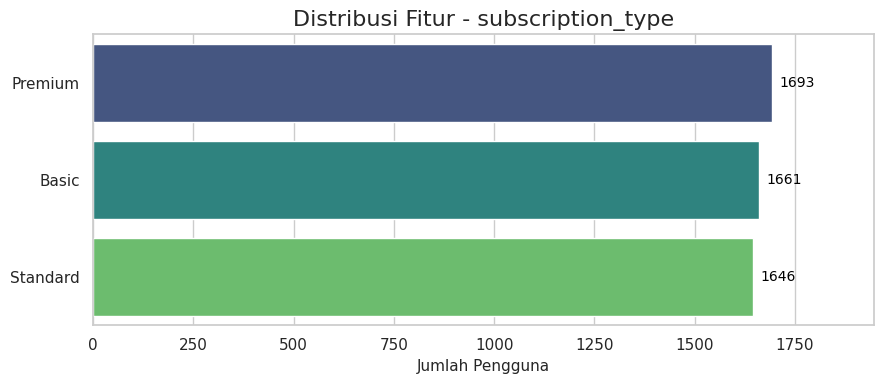

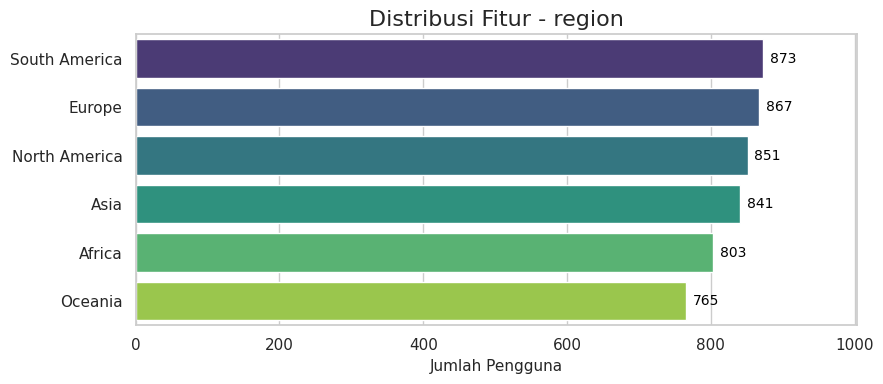

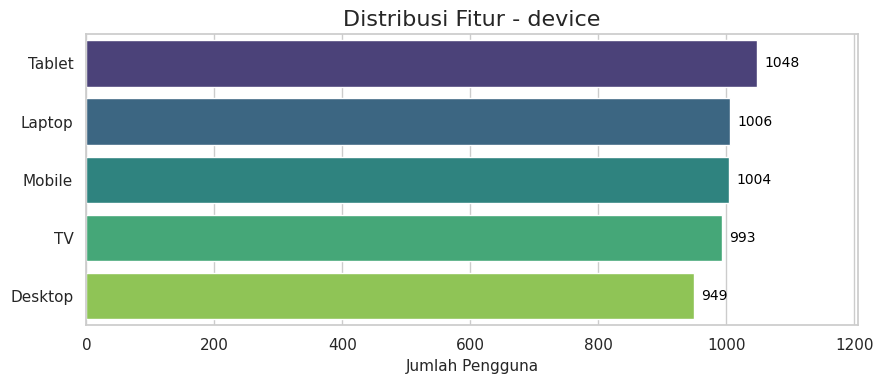

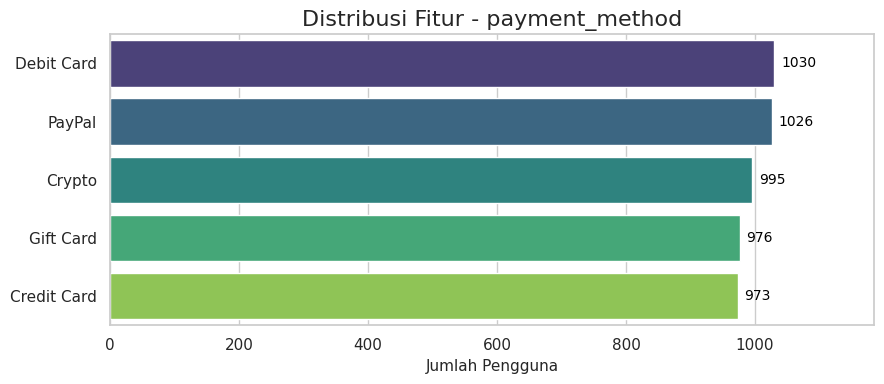

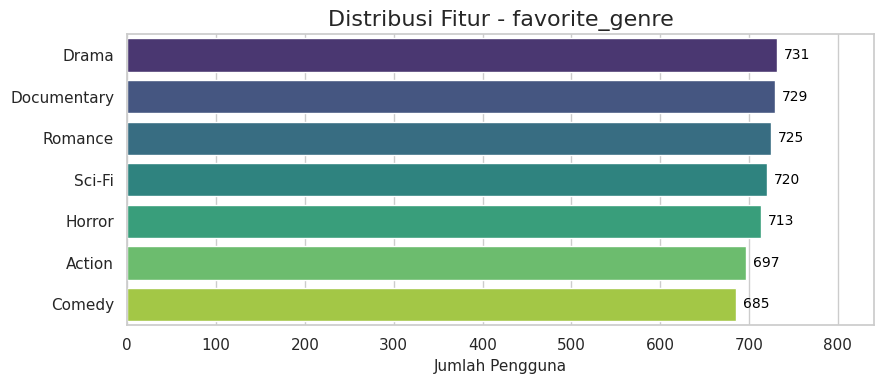

In [10]:
categorical_features = ['gender', 'subscription_type', 'region', 'device', 'payment_method', 'favorite_genre']

for col in categorical_features:
    plt.figure(figsize=(9, 4))
    ax = sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')
    ax.bar_label(ax.containers[0],  fmt='%.0f', padding=5, fontsize=10, color='black') #count
    
    plt.title(f'Distribusi Fitur - {col}', fontsize=16)
    plt.xlabel('Jumlah Pengguna', fontsize=11)
    plt.ylabel('')    
    plt.xlim(0, df[col].value_counts().max() * 1.15)
        
    plt.tight_layout()
    plt.show()

### **6. ANALISIS BIVARIAT - CHURN & FITUR KATEGORIKAL**

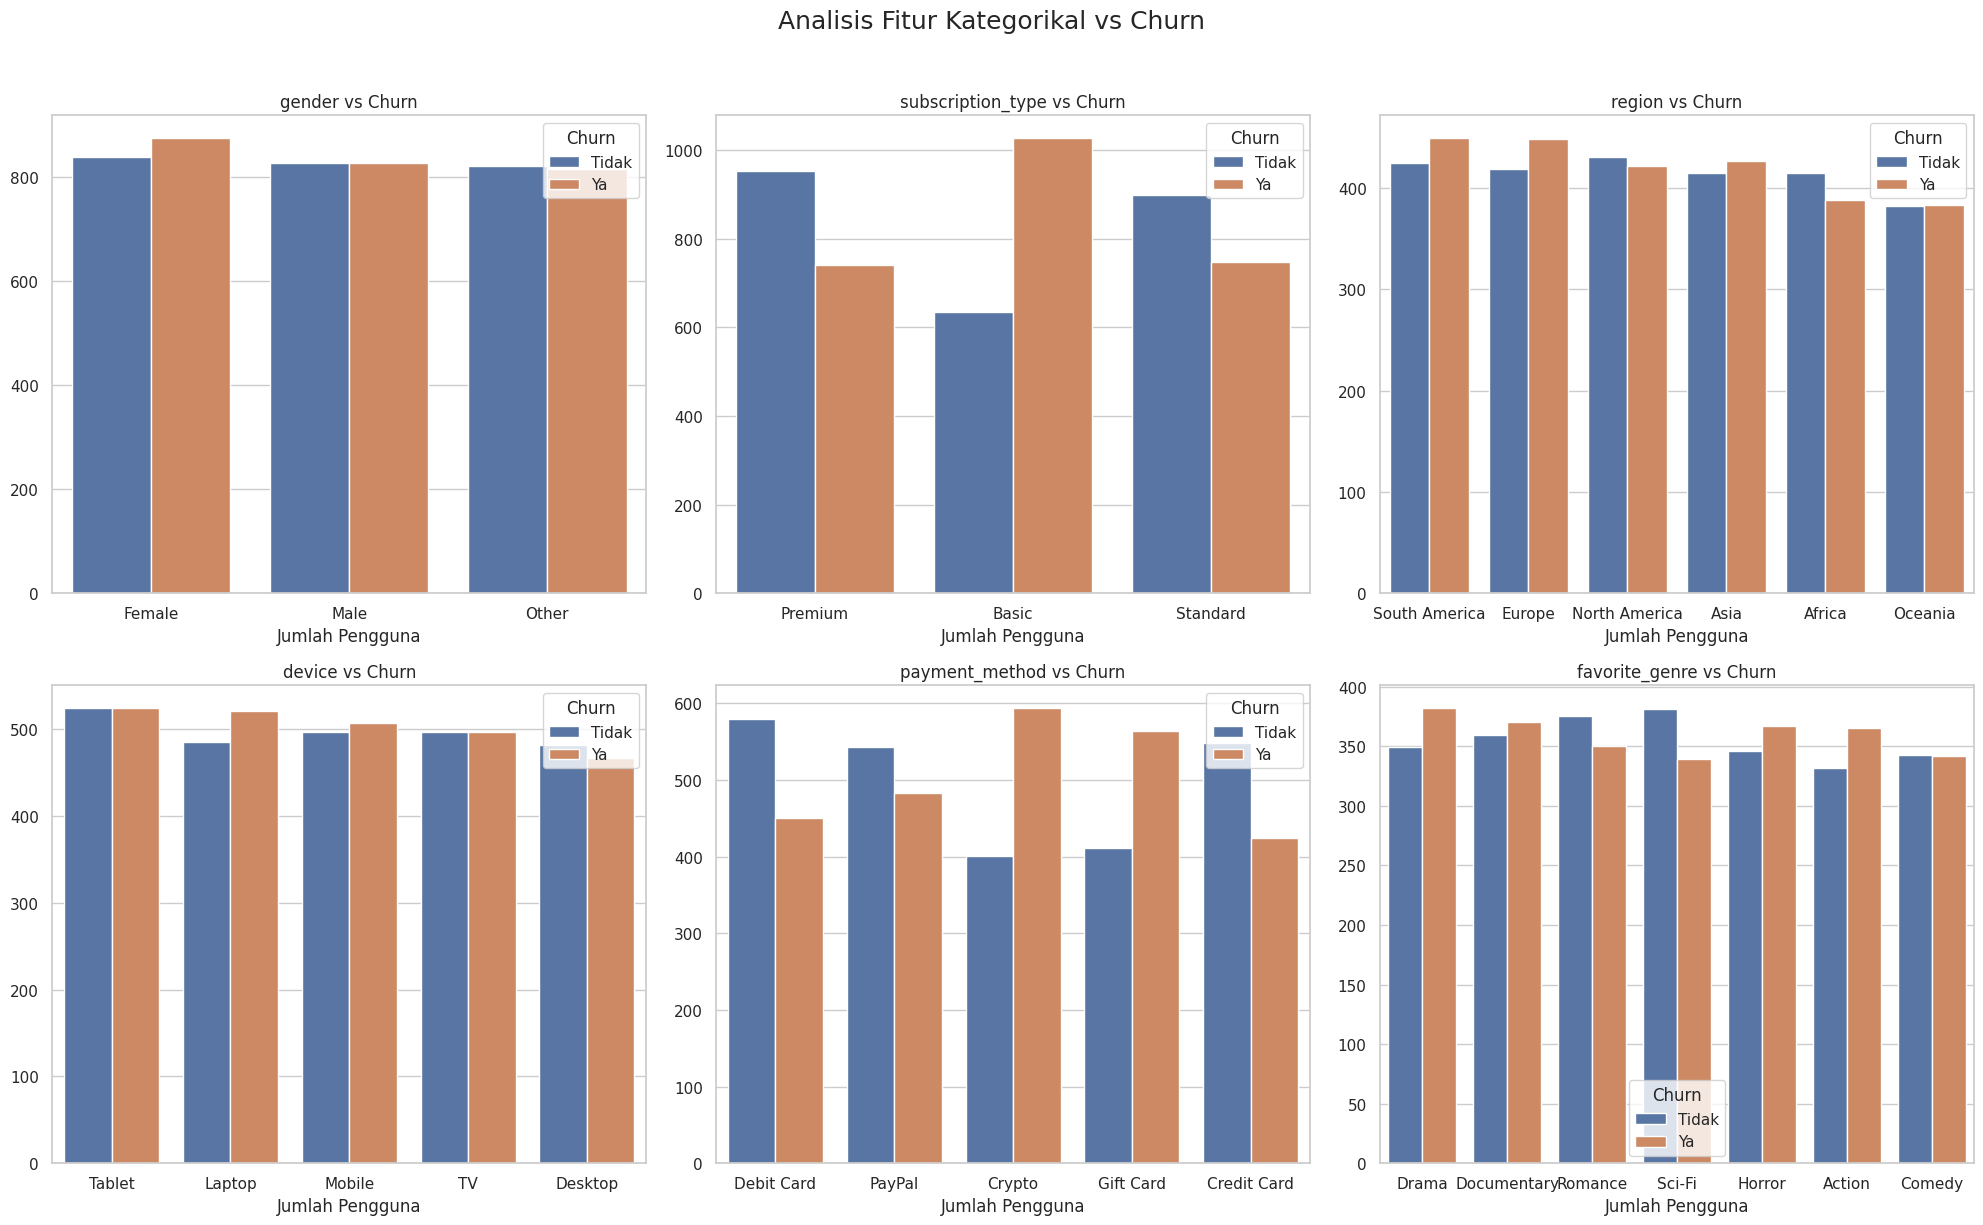

In [11]:
plt.figure(figsize=(20, 12))
plt.suptitle('Analisis Fitur Kategorikal vs Churn', fontsize=18, y=1.02)

for i, col in enumerate(categorical_features):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=df, x=col, hue='churned', order=df[col].value_counts().index)
    plt.title(f'{col} vs Churn')
    plt.xlabel('Jumlah Pengguna')
    plt.ylabel('')
    plt.legend(title='Churn', labels=['Tidak', 'Ya'])
plt.tight_layout()
plt.show()

### **7. ANALISIS BIVARIAT - CHURN & FITUR NUMERIK**

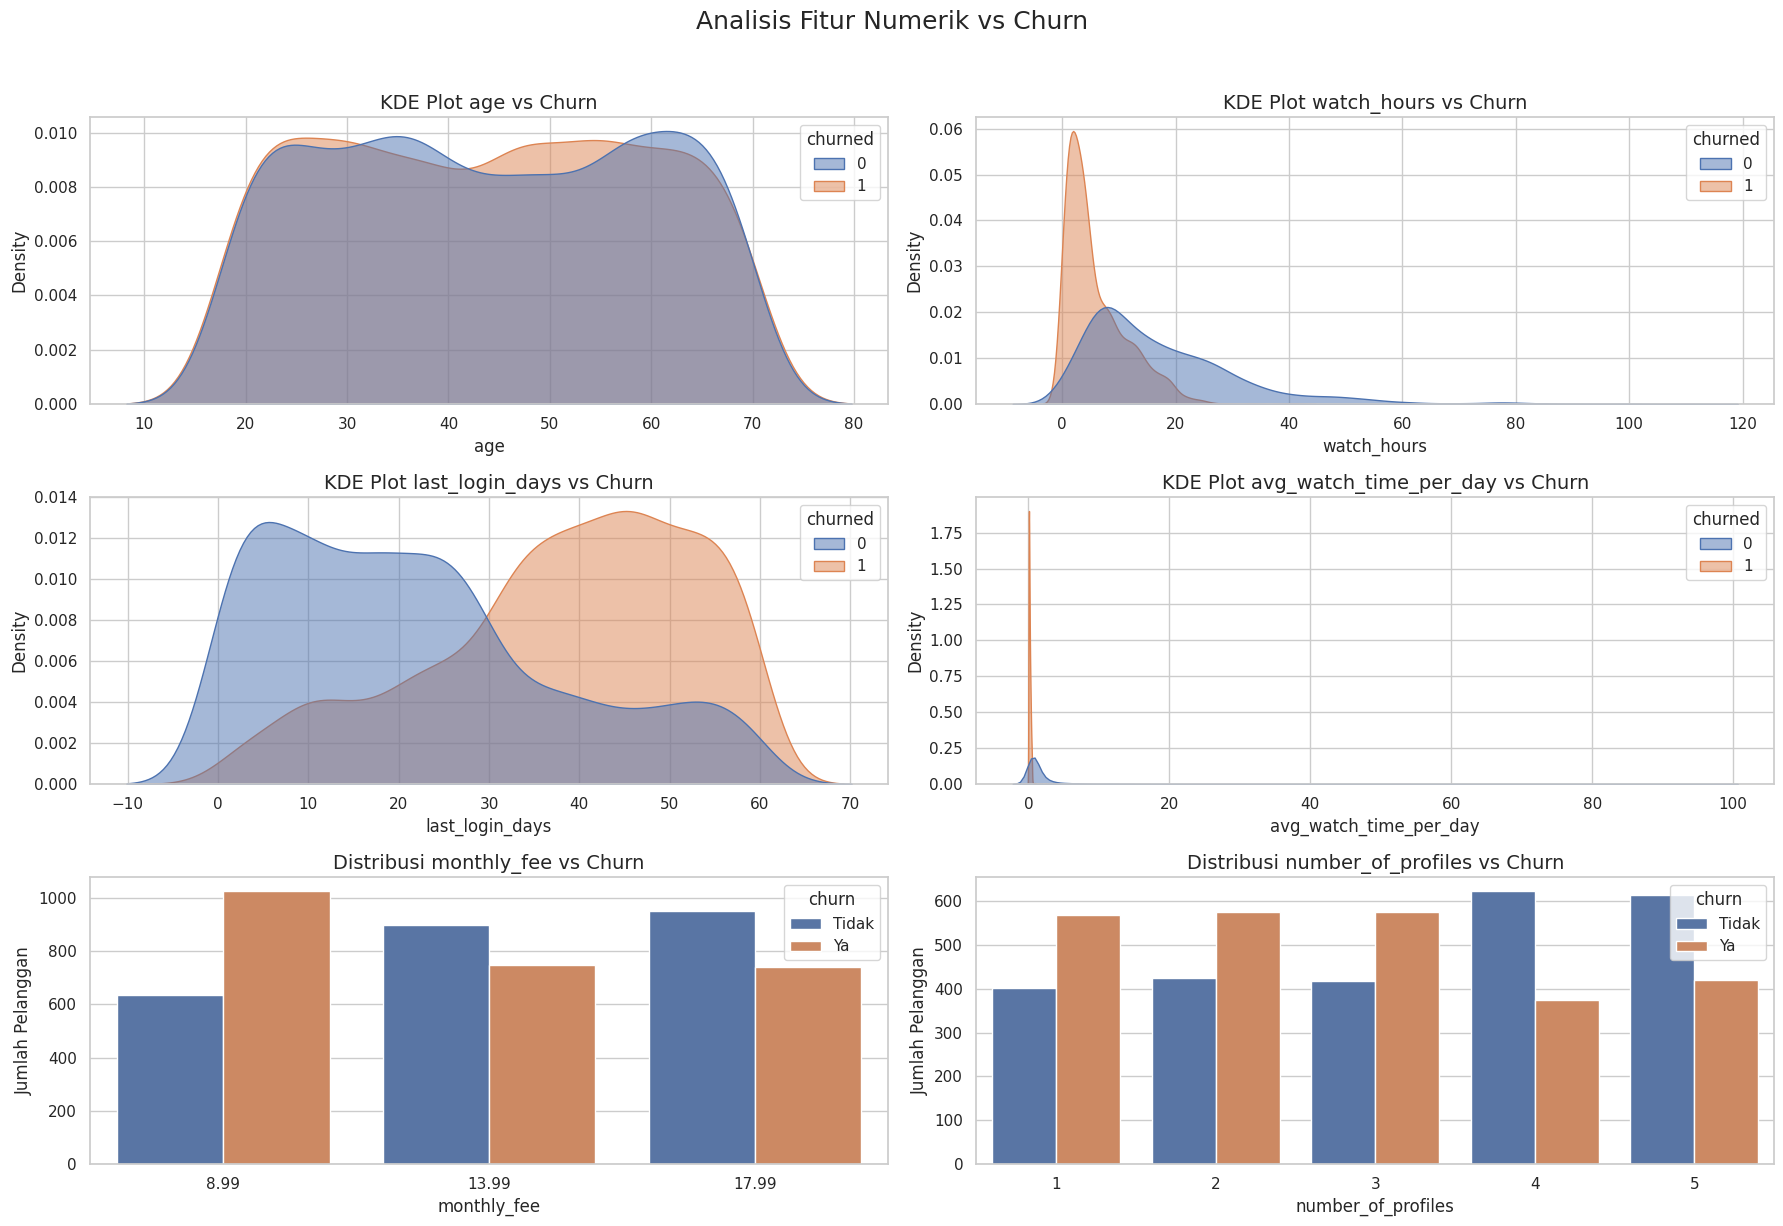

In [12]:
plt.figure(figsize=(18, 12))
plt.suptitle('Analisis Fitur Numerik vs Churn', fontsize=18, y=1.02)

for i, col in enumerate(numerical_features):
    ax = plt.subplot(3, 2, i + 1)
    
    if col in ['monthly_fee', 'number_of_profiles']:
        sns.countplot(data=df, x=col, hue='churned', ax=ax)
        ax.set_title(f'Distribusi {col} vs Churn', fontsize=14)
        ax.set_ylabel('Jumlah Pelanggan', fontsize=12)

    else:
        sns.kdeplot(data=df, x=col, hue='churned', fill=True, alpha=0.5, ax=ax)
        ax.set_title(f'KDE Plot {col} vs Churn', fontsize=14)
        ax.set_ylabel('Density', fontsize=12)

    ax.set_xlabel(col, fontsize=12)
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        ax.legend(handles, ['Tidak', 'Ya'], title='churn')

plt.tight_layout()
plt.show()

In [13]:
# Loop melalui setiap fitur numerik
for feature in numerical_features:    
    feature_df = df.groupby('churned').agg({
        feature: ['mean', 'median', 'max', 'std']
    })    
    display(feature_df)
    print("\n" + "="*50 + "\n")

age                      
              mean median max        std
churned                                 
0        43.902213   44.0  70  15.532694
1        43.793241   44.0  70  15.472773

watch_hours                          
               mean median     max        std
churned                                      
0         17.449590  13.86  110.40  13.923952
1          5.918497   4.06   41.33   5.418978

last_login_days                      
                   mean median max        std
churned                                      
0             21.771026   19.0  60  16.155030
1             38.309344   41.0  60  14.751904

avg_watch_time_per_day                        
                          mean median    max       std
churned                                               
0                     1.594133   0.72  98.42  3.570493
1                     0.164048   0.12   4.32  0.186164

monthly_fee                        
               mean median    max       std
churned                                    
0         14.248350  13.99  17.99  3.528817
1         13.125189  13.99  17.99  3.764869

number_of_profiles                     
                      mean median max       std
churned                                        
0                 3.250302    3.0   5  1.412834
1                 2.801193    3.0   5  1.383301

### **8. ANALISIS MULTIVARIAT - SEGMENTASI CHURN**

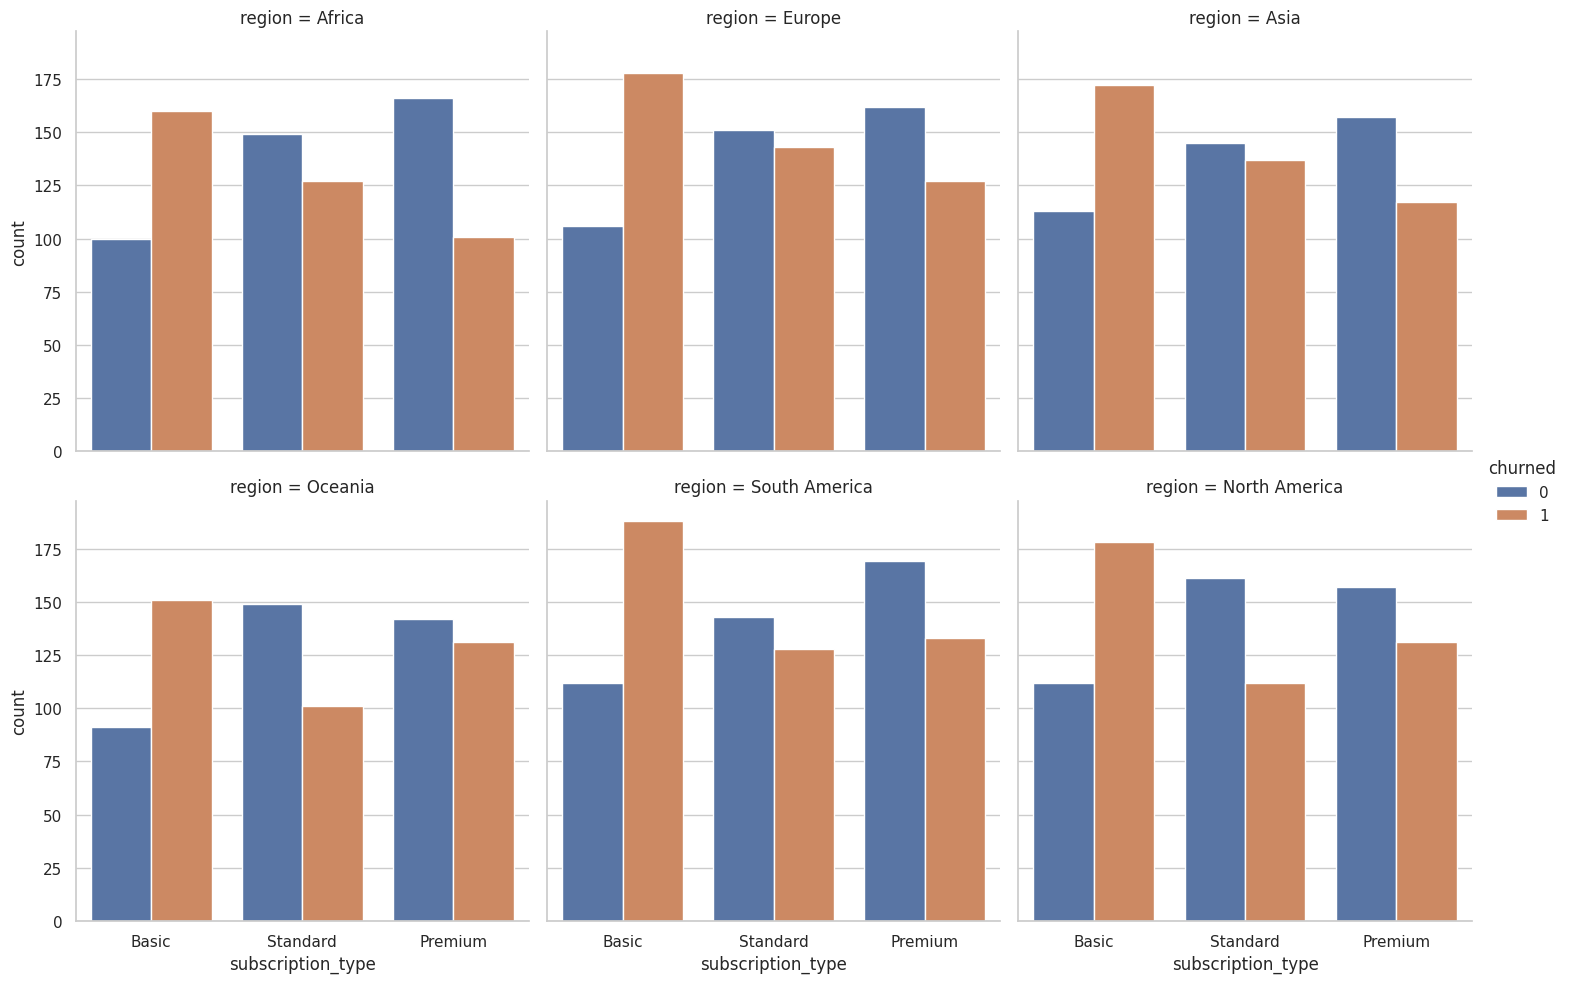

In [14]:
sns.catplot(
    data=df, 
    x='subscription_type',  
    col='region',           
    hue='churned',          
    kind='count',           
    col_wrap=3            
)
plt.show()

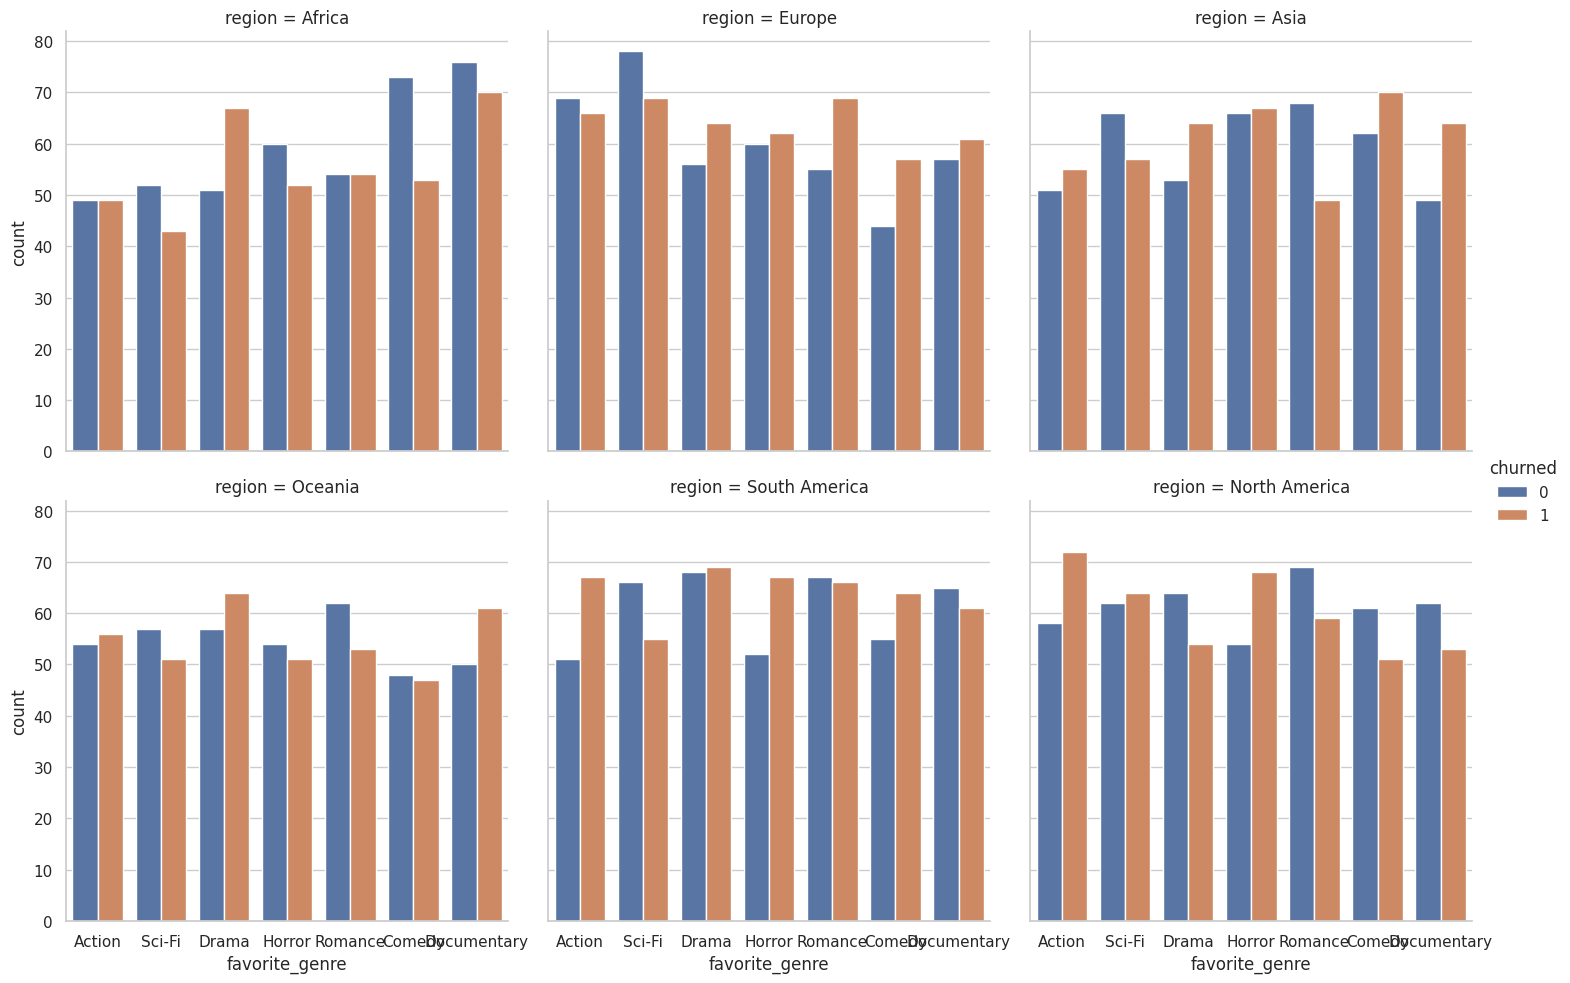

In [15]:
sns.catplot(
    data=df, 
    x='favorite_genre',  
    col='region',           
    hue='churned',          
    kind='count',           
    col_wrap=3            
)
plt.show()

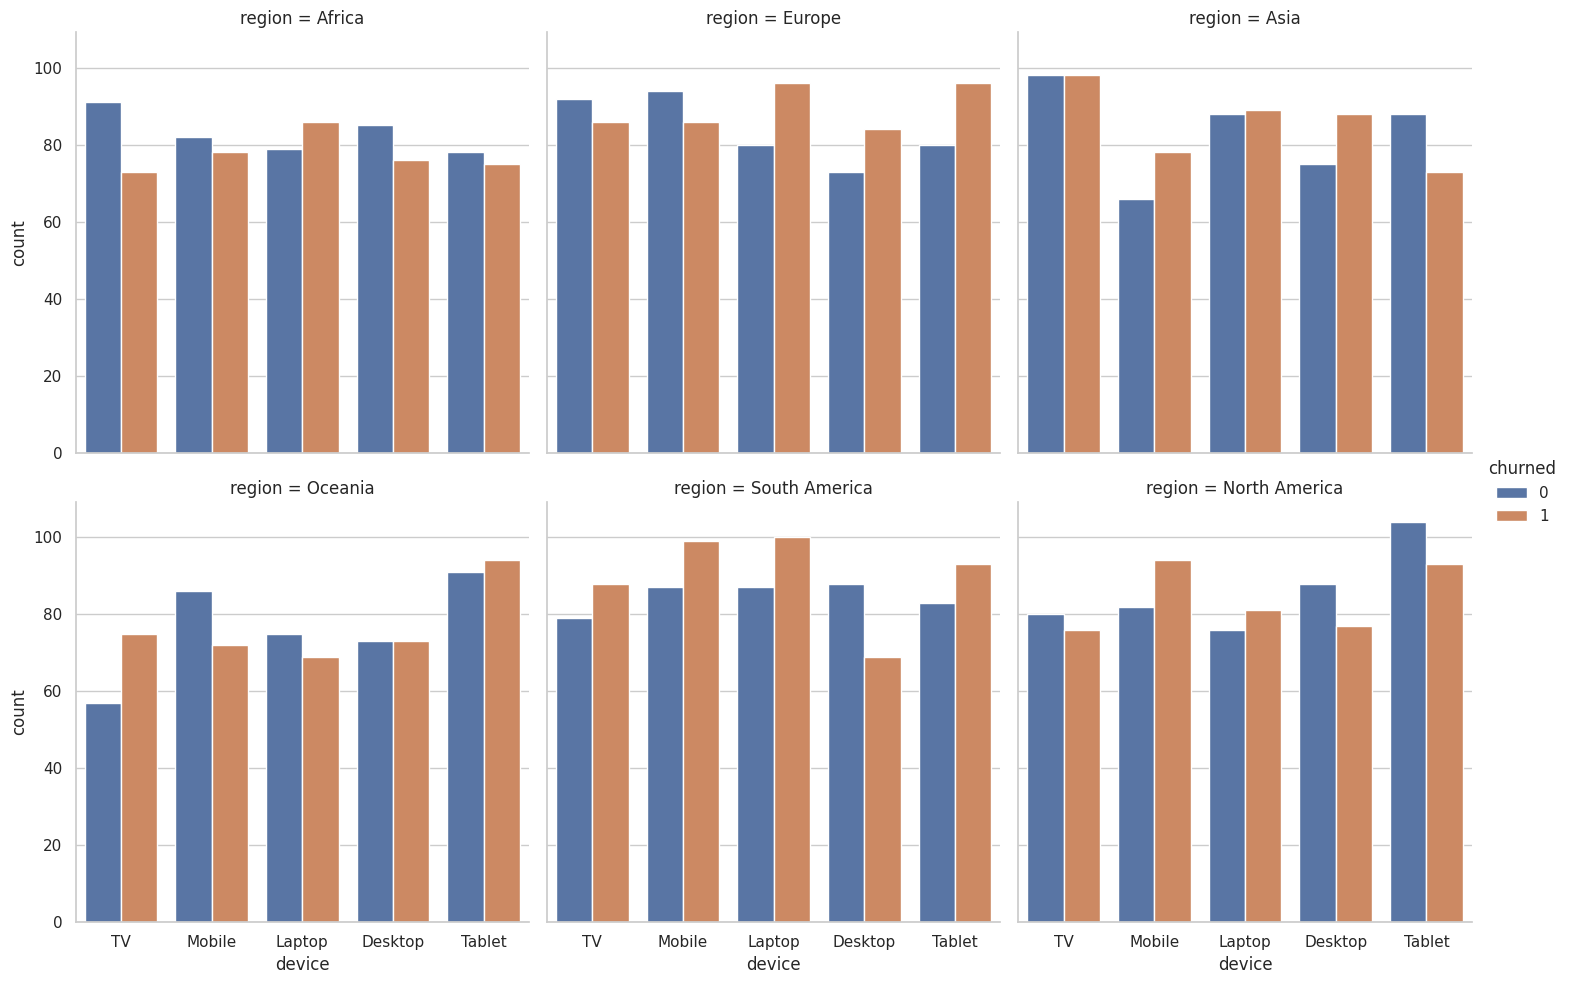

In [16]:
sns.catplot(
    data=df, 
    x='device',  
    col='region',           
    hue='churned',          
    kind='count',           
    col_wrap=3            
)
plt.show()

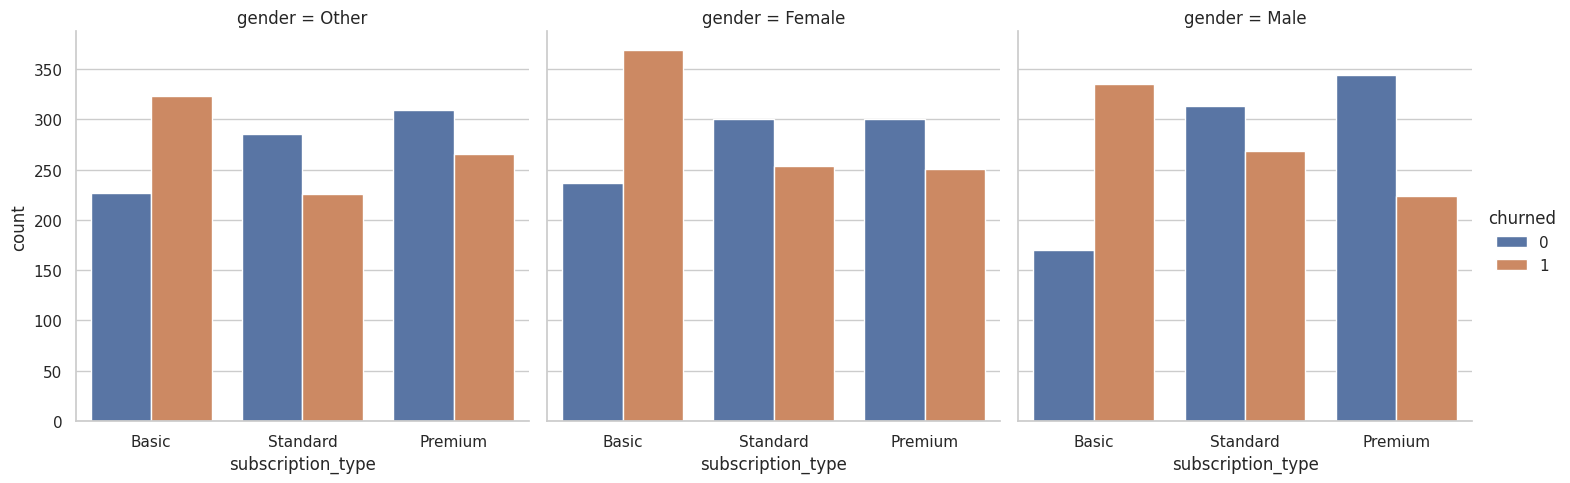

In [17]:
sns.catplot(
    data=df, 
    x='subscription_type',  
    col='gender',          
    hue='churned',          
    kind='count',           
    col_wrap=3             
)
plt.show()

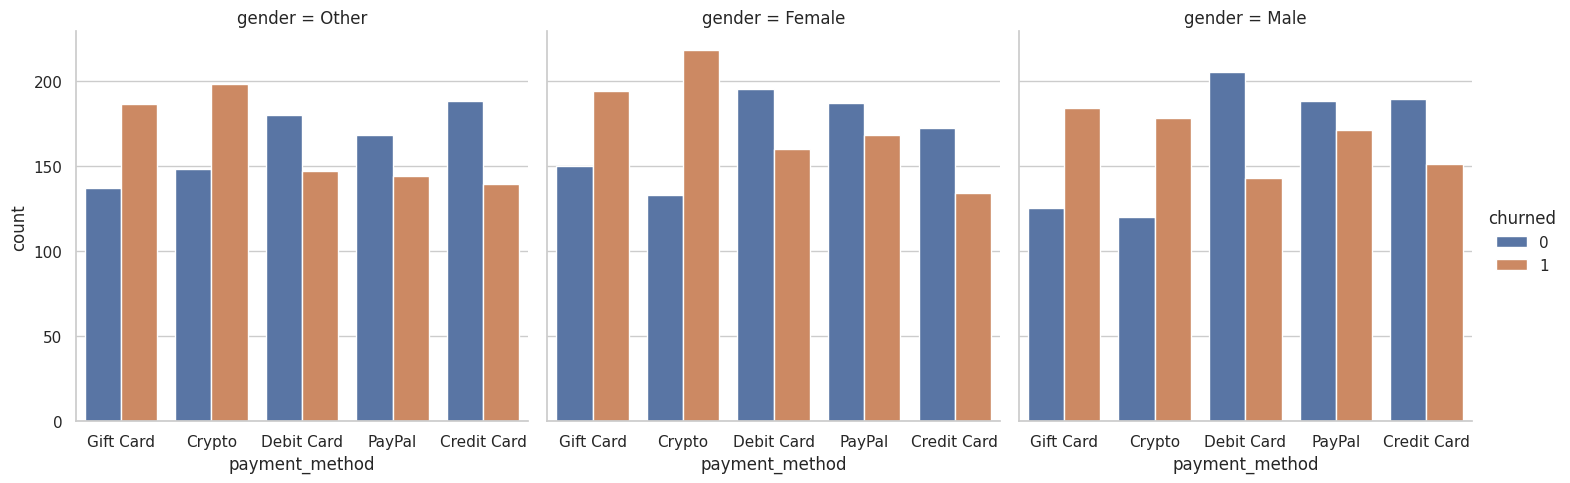

In [18]:
sns.catplot(
    data=df, 
    x='payment_method',  
    col='gender',           
    hue='churned',          
    kind='count',           
    col_wrap=3              
)
plt.show()